In [1]:
import numpy as np, pennylane as qml, torch, matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
mnist_train = datasets.MNIST("./data",
                             train= True,
                             transform= ToTensor(),
                             download= True)
mnist_test = datasets.MNIST("./data",
                            train= False,
                            transform= ToTensor(),
                            download= True)

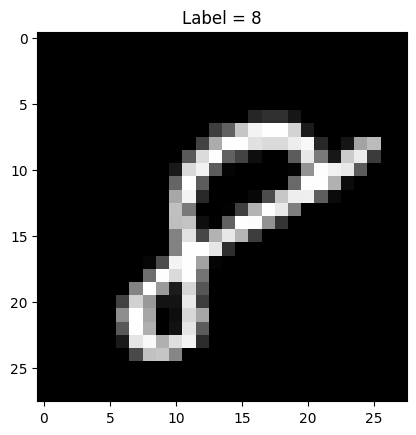

In [4]:
image, label = mnist_train[60000 - 1]
plt.imshow(image.squeeze(), cmap='gray')
#plt.axis("off")
plt.title(f"Label = {label}")
plt.show()

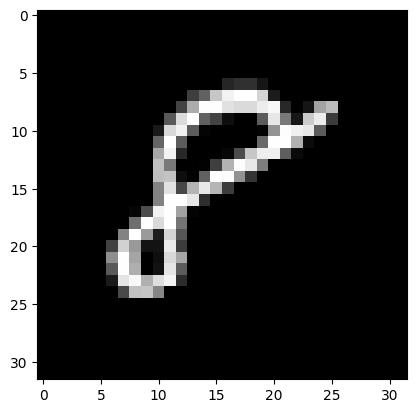

torch.Size([32, 32])


In [5]:
target = torch.zeros([32, 32])
target[:28, :28] = image[0, :, :]
image.type
plt.imshow(target.squeeze(), cmap='gray')
plt.show()

print(target.shape)

In [6]:
def get_image(idx: int, dataset):
    image, label = dataset[idx]
    padded_image = torch.zeros([32, 32])
    padded_image[:28, :28] = image.squeeze()[:, :]
    return padded_image

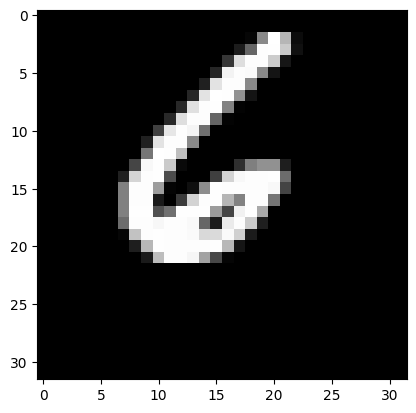

In [8]:
img = get_image(785, mnist_train)
plt.imshow(img, cmap='gray')
plt.show()

In [24]:
img[2, 18]

tensor(0.0235)

In [21]:
img[img!=0]

tensor([0.0235, 0.5373, 1.0000, 0.7137, 0.0431, 0.1098, 0.4000, 0.9922, 0.9961,
        0.7922, 0.0627, 0.2118, 0.8706, 0.9922, 0.9922, 0.8000, 0.0863, 0.1490,
        0.9529, 0.9922, 0.9843, 0.5373, 0.0784, 0.1294, 0.8941, 0.9922, 0.9922,
        0.5373, 0.1490, 0.8941, 1.0000, 0.9961, 0.5725, 0.0784, 0.1608, 0.8784,
        0.9922, 0.9961, 0.5098, 0.0118, 0.1608, 0.8706, 0.9922, 0.9922, 0.3961,
        0.0118, 0.2510, 0.9020, 0.9922, 0.9608, 0.4392, 0.1294, 0.8941, 0.9922,
        0.9922, 0.5373, 0.4627, 1.0000, 0.9961, 0.7490, 0.2706, 0.9725, 0.9961,
        0.7922, 0.0353, 0.1843, 0.4980, 0.5686, 0.5686, 0.1176, 0.1255, 0.8353,
        0.9922, 0.9961, 0.2980, 0.2471, 0.8275, 0.9725, 0.9922, 0.9922, 0.9961,
        0.4235, 0.5020, 0.9922, 0.9922, 0.6157, 0.0157, 0.0588, 0.5529, 0.9961,
        0.9922, 0.9922, 0.9922, 0.9922, 0.9725, 0.2667, 0.5020, 0.9922, 0.9922,
        0.1020, 0.2314, 0.8314, 0.9922, 0.9961, 0.7098, 0.5098, 0.9922, 0.9922,
        0.4588, 0.5020, 0.9961, 0.9961, 

In [11]:
def img_to_vec(image: torch.Tensor):
    n = int(np.log2(image.shape[0]))  # Image should be a 2^n x 2^n tensor
    image = image.reshape([2 for i in range(2*n)])  # Convert tensor indices from y,x to y0,y1,...,yn-1,x0,x1,...,xn-1
    image = image.permute([i+j for i in range(n) for j in [0, n]])  # Permute indices from y0,y1,...,yn-1,x0,x1,...,xn-1 to y0,x0,y1,x1,...,yn-1,xn-1
    return image.flatten()

In [30]:
vec = img_to_vec(img)
torch.all(vec[vec!=0].sort().values == img[img!=0].sort().values)

tensor(True)

In [31]:
len(vec)

1024

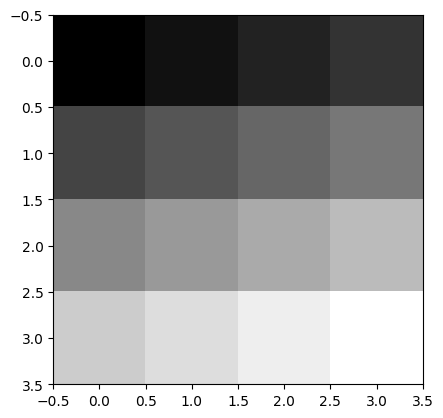

In [6]:
test_image = torch.tensor([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])
plt.imshow(test_image, cmap = 'gray')
plt.show()

In [7]:
img_to_vec(test_image)

2


tensor([ 1,  2,  5,  6,  3,  4,  7,  8,  9, 10, 13, 14, 11, 12, 15, 16])

In [31]:
test_image = test_image.reshape([2, 2, 2, 2])
for i in test_image: print(i)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
tensor([[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])


In [37]:
n = 5
[i+j for i in range(n) for j in [0, n]]

[0, 5, 1, 6, 2, 7, 3, 8, 4, 9]

In [32]:
test_image = test_image.permute([0, 2, 1, 3])

In [33]:
test_image

tensor([[[[ 1,  2],
          [ 5,  6]],

         [[ 3,  4],
          [ 7,  8]]],


        [[[ 9, 10],
          [13, 14]],

         [[11, 12],
          [15, 16]]]])

In [34]:
test_image.flatten()

tensor([ 1,  2,  5,  6,  3,  4,  7,  8,  9, 10, 13, 14, 11, 12, 15, 16])

In [ ]:
target = target.reshape([2 for _ in range(10)])
target

tensor([[[[[[[[[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]],


              [[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]]],



             [[[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]],


              [[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]]]],




            [[[[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]],


              [[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]]],



             [[[[0.0000, 0.0000],
                [0.0000, 0.0000]],

               [[0.0000, 0.0000],
                [0.0000, 0.0000]]],
